### Importing all Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.np_utils import to_categorical

### Data loading and Visualization

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


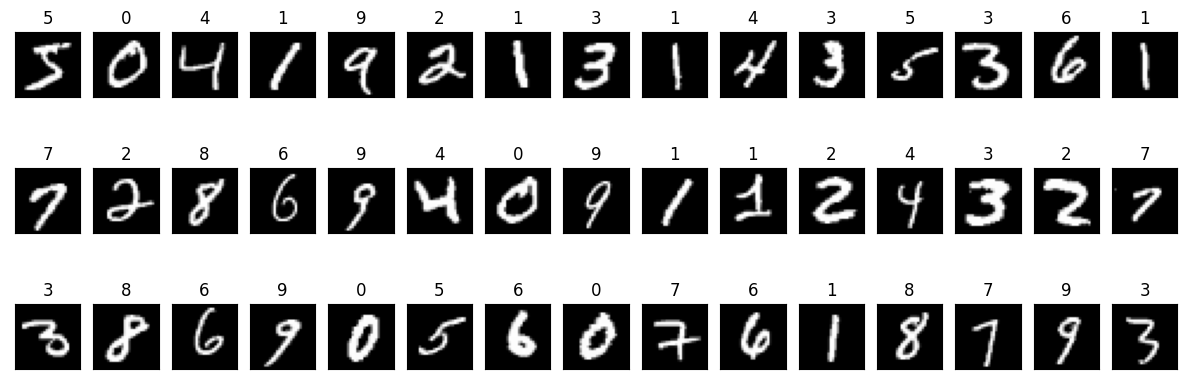

In [4]:
#Lets plot some input images to see
fig = plt.figure(figsize=(15,5))
for i in range(45):
    a=fig.add_subplot(3,15,i+1,xticks=[],yticks=[])#to remove axex
    a.imshow(np.squeeze(x_train[i]),cmap='gray')
    a.set_title(y_train[i])

### Data Preprocessing

In [5]:
X_train = x_train.reshape(x_train.shape[0],28*28)
X_test = x_test.reshape(x_test.shape[0],28*28)

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)
print("Y_train Shape : ",y_train.shape)
print("Y_test Shape : ",y_test.shape)

Y_train Shape :  (60000, 10)
Y_test Shape :  (10000, 10)


In [7]:
from sklearn.decomposition import PCA
pca= PCA(n_components=300)

data = np.concatenate((X_train,X_test),axis=0)
pca.fit(data)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
y_train_pca = y_train
y_test_pca = y_test

In [8]:
print('X_train_PCA: ' + str(X_train_pca.shape))
print('Y_train_PCA: ' + str(y_train_pca.shape))
print('X_test_PCA:  '  + str(X_test_pca.shape))
print('Y_test_PCA:  '  + str(y_test_pca.shape))

X_train_PCA: (60000, 300)
Y_train_PCA: (60000, 10)
X_test_PCA:  (10000, 300)
Y_test_PCA:  (10000, 10)


### Defining Model Architecture

In [9]:
METRICS = ['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]

In [10]:
model_1 = Sequential()
model_1.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model_1.add(Dense(10, activation="softmax"))
model_1.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_2 = Sequential()
model_2.add(Dense(256, input_shape=(784,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_2.add(Dense(10, activation="softmax"))
model_2.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_3 = Sequential()
model_3.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model_3.add(Dense(128, activation="sigmoid"))
model_3.add(Dense(10, activation="softmax"))
model_3.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_4 = Sequential()
model_4.add(Dense(256, input_shape=(784,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_4.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_4.add(Dense(10, activation="softmax"))
model_4.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_5 = Sequential()
model_5.add(Dense(256, input_shape=(300,), activation="sigmoid"))
model_5.add(Dense(10, activation="softmax"))
model_5.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 79,626
Trainable params: 79,626
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_6 = Sequential()
model_6.add(Dense(256, input_shape=(300,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_6.add(Dense(10, activation="softmax"))
model_6.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 79,626
Trainable params: 79,626
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_7 = Sequential()
model_7.add(Dense(256, input_shape=(300,), activation="sigmoid"))
model_7.add(Dense(128, activation="sigmoid"))
model_7.add(Dense(10, activation="softmax"))
model_7.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 111,242
Trainable params: 111,242
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_8 = Sequential()
model_8.add(Dense(256, input_shape=(300,), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_8.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_8.add(Dense(10, activation="softmax"))
model_8.compile(loss="categorical_crossentropy", optimizer="adam",metrics=METRICS)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               77056     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 111,242
Trainable params: 111,242
Non-trainable params: 0
_________________________________________________________________


### Training All Models

#### Model-1

In [18]:
history_1 = model_1.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/15
938/938 [==============================] - 6s 3ms/step - loss: 0.4541 - accuracy: 0.8777 - precision: 0.9445 - recall: 0.8008 - val_loss: 0.3086 - val_accuracy: 0.9166 - val_precision: 0.9481 - val_recall: 0.8861
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2946 - accuracy: 0.9179 - precision: 0.9458 - recall: 0.8905 - val_loss: 0.2735 - val_accuracy: 0.9217 - val_precision: 0.9452 - val_recall: 0.8990
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2715 - accuracy: 0.9217 - precision: 0.9462 - recall: 0.8998 - val_loss: 0.2591 - val_accuracy: 0.9211 - val_precision: 0.9447 - val_recall: 0.9001
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2500 - accuracy: 0.9268 - precision: 0.9468 - recall: 0.9087 - val_loss: 0.2420 - val_accuracy: 0.9317 - val_precision: 0.9507 - val_recall: 0.9118
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2416 - accuracy: 0.9284 - pr

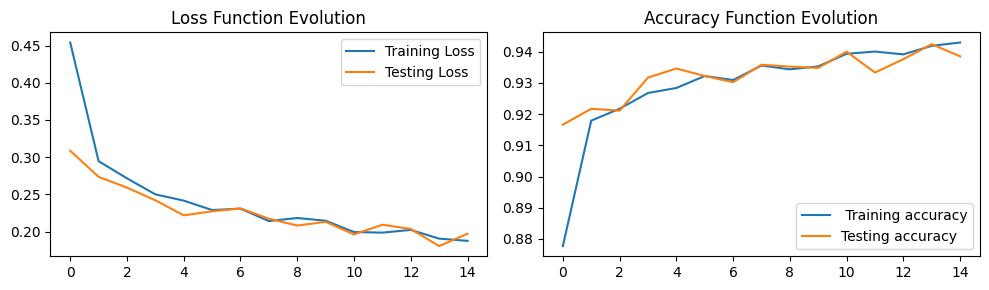

In [19]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label=' Training accuracy')
plt.plot(history_1.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-2

In [20]:
history_2 = model_2.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 4.1178 - accuracy: 0.8967 - precision: 0.9043 - recall: 0.9014 - val_loss: 1.2000 - val_accuracy: 0.9277 - val_precision: 0.9280 - val_recall: 0.9277
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 1.0346 - accuracy: 0.9367 - precision: 0.9370 - recall: 0.9366 - val_loss: 1.5778 - val_accuracy: 0.9151 - val_precision: 0.9154 - val_recall: 0.9151
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.9337 - accuracy: 0.9488 - precision: 0.9490 - recall: 0.9487 - val_loss: 1.2533 - val_accuracy: 0.9388 - val_precision: 0.9389 - val_recall: 0.9388
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.8635 - accuracy: 0.9559 - precision: 0.9559 - recall: 0.9559 - val_loss: 1.0450 - val_accuracy: 0.9515 - val_precision: 0.9516 - val_recall: 0.9515
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.7865 - accuracy: 0.9619 - pr

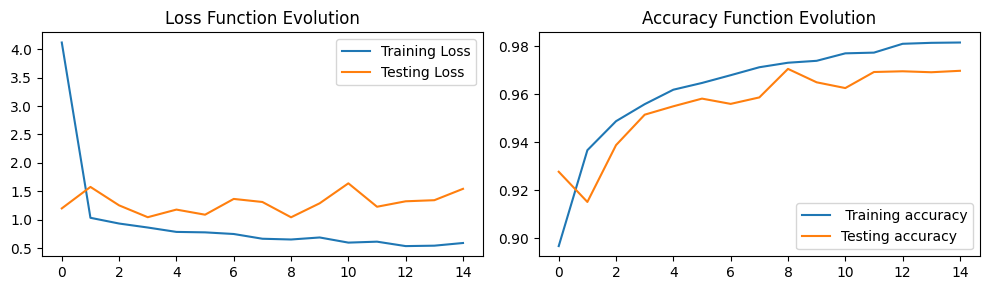

In [21]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label=' Training accuracy')
plt.plot(history_2.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-3

In [22]:
history_3 = model_3.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4909 - accuracy: 0.8719 - precision: 0.9449 - recall: 0.8069 - val_loss: 0.3154 - val_accuracy: 0.9058 - val_precision: 0.9325 - val_recall: 0.8792
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2893 - accuracy: 0.9149 - precision: 0.9382 - recall: 0.8939 - val_loss: 0.2836 - val_accuracy: 0.9120 - val_precision: 0.9353 - val_recall: 0.8959
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2603 - accuracy: 0.9209 - precision: 0.9390 - recall: 0.9049 - val_loss: 0.2551 - val_accuracy: 0.9243 - val_precision: 0.9415 - val_recall: 0.9105
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2505 - accuracy: 0.9237 - precision: 0.9406 - recall: 0.9093 - val_loss: 0.2356 - val_accuracy: 0.9253 - val_precision: 0.9408 - val_recall: 0.9145
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2347 - accuracy: 0.9277 - pr

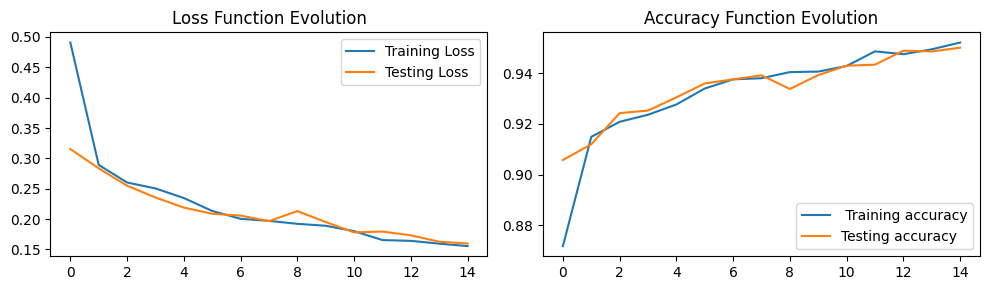

In [23]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label=' Training accuracy')
plt.plot(history_3.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-4

In [24]:
history_4 = model_4.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6109 - accuracy: 0.8936 - precision: 0.9045 - recall: 0.8995 - val_loss: 0.3022 - val_accuracy: 0.9385 - val_precision: 0.9412 - val_recall: 0.9366
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3727 - accuracy: 0.9297 - precision: 0.9324 - recall: 0.9283 - val_loss: 0.7731 - val_accuracy: 0.8869 - val_precision: 0.8899 - val_recall: 0.8846
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4318 - accuracy: 0.9355 - precision: 0.9372 - recall: 0.9346 - val_loss: 0.3656 - val_accuracy: 0.9491 - val_precision: 0.9500 - val_recall: 0.9485
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3906 - accuracy: 0.9429 - precision: 0.9441 - recall: 0.9424 - val_loss: 0.4858 - val_accuracy: 0.9371 - val_precision: 0.9380 - val_recall: 0.9368
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3457 - accuracy: 0

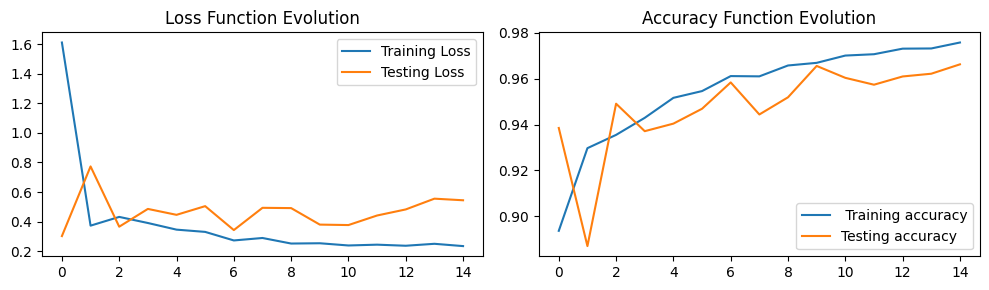

In [25]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_4.history['loss'], label='Training Loss')
plt.plot(history_4.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_4.history['accuracy'], label=' Training accuracy')
plt.plot(history_4.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-5

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4307 - accuracy: 0.8757 - precision: 0.9431 - recall: 0.8365 - val_loss: 0.2600 - val_accuracy: 0.9240 - val_precision: 0.9466 - val_recall: 0.9062
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2450 - accuracy: 0.9292 - precision: 0.9486 - recall: 0.9125 - val_loss: 0.2374 - val_accuracy: 0.9293 - val_precision: 0.9455 - val_recall: 0.9156
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2177 - accuracy: 0.9360 - precision: 0.9515 - recall: 0.9237 - val_loss: 0.2204 - val_accuracy: 0.9320 - val_precision: 0.9491 - val_recall: 0.9202
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1979 - accuracy: 0.9416 - precision: 0.9554 - recall: 0.9309 - val_loss: 0.2131 - val_accuracy: 0.9361 - val_precision: 0.9503 - val_recall: 0.9246
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0

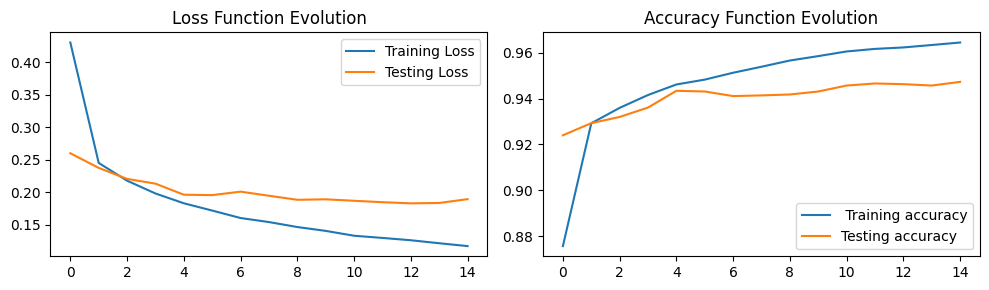

In [26]:
history_5 = model_5.fit(X_train_pca, y_train_pca, epochs=15, batch_size=32, validation_data=(X_test_pca, y_test_pca), shuffle=True)
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_5.history['loss'], label='Training Loss')
plt.plot(history_5.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_5.history['accuracy'], label=' Training accuracy')
plt.plot(history_5.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-6

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 7.0127 - accuracy: 0.8970 - precision: 0.9051 - recall: 0.9033 - val_loss: 3.3243 - val_accuracy: 0.9398 - val_precision: 0.9398 - val_recall: 0.9398
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4025 - accuracy: 0.9499 - precision: 0.9499 - recall: 0.9499 - val_loss: 3.2757 - val_accuracy: 0.9434 - val_precision: 0.9434 - val_recall: 0.9434
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8738 - accuracy: 0.9594 - precision: 0.9594 - recall: 0.9594 - val_loss: 2.7080 - val_accuracy: 0.9513 - val_precision: 0.9513 - val_recall: 0.9513
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6540 - accuracy: 0.9655 - precision: 0.9655 - recall: 0.9655 - val_loss: 2.7907 - val_accuracy: 0.9516 - val_precision: 0.9516 - val_recall: 0.9516
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4063 - accuracy: 0

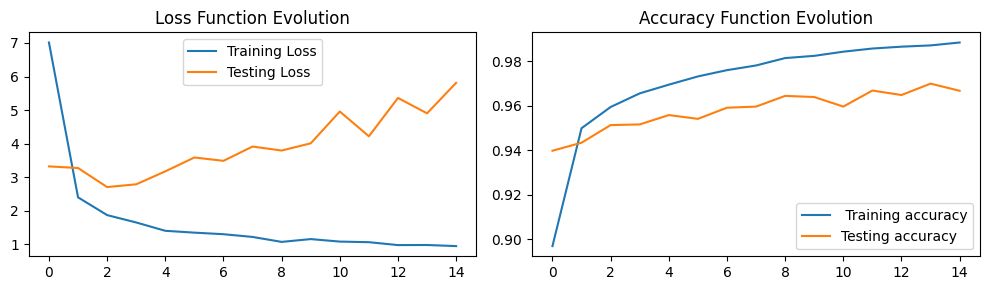

In [27]:
history_6 = model_6.fit(X_train_pca, y_train_pca, epochs=15, batch_size=32, validation_data=(X_test_pca, y_test_pca), shuffle=True)
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_6.history['loss'], label='Training Loss')
plt.plot(history_6.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_6.history['accuracy'], label=' Training accuracy')
plt.plot(history_6.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-7

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4093 - accuracy: 0.8874 - precision: 0.9472 - recall: 0.8426 - val_loss: 0.2472 - val_accuracy: 0.9254 - val_precision: 0.9444 - val_recall: 0.9100
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2125 - accuracy: 0.9370 - precision: 0.9520 - recall: 0.9239 - val_loss: 0.1973 - val_accuracy: 0.9409 - val_precision: 0.9531 - val_recall: 0.9300
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1715 - accuracy: 0.9486 - precision: 0.9600 - recall: 0.9390 - val_loss: 0.1673 - val_accuracy: 0.9479 - val_precision: 0.9605 - val_recall: 0.9409
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1441 - accuracy: 0.9566 - precision: 0.9661 - recall: 0.9490 - val_loss: 0.1622 - val_accuracy: 0.9498 - val_precision: 0.9578 - val_recall: 0.9411
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0

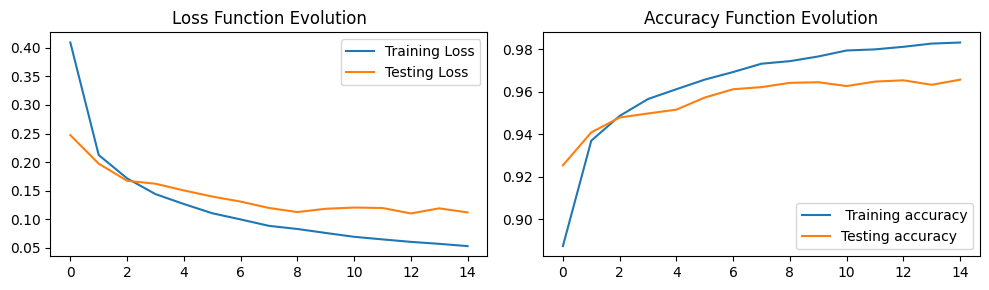

In [28]:
history_7 = model_7.fit(X_train_pca, y_train_pca, epochs=15, batch_size=32, validation_data=(X_test_pca, y_test_pca), shuffle=True)
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_7.history['loss'], label='Training Loss')
plt.plot(history_7.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_7.history['accuracy'], label=' Training accuracy')
plt.plot(history_7.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

#### Model-8

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 3.0312 - accuracy: 0.9043 - precision: 0.9140 - recall: 0.9127 - val_loss: 0.6772 - val_accuracy: 0.9457 - val_precision: 0.9463 - val_recall: 0.9455
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5519 - accuracy: 0.9463 - precision: 0.9466 - recall: 0.9461 - val_loss: 0.8062 - val_accuracy: 0.9419 - val_precision: 0.9422 - val_recall: 0.9419
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5410 - accuracy: 0.9509 - precision: 0.9511 - recall: 0.9506 - val_loss: 0.7951 - val_accuracy: 0.9408 - val_precision: 0.9409 - val_recall: 0.9407
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5445 - accuracy: 0.9550 - precision: 0.9552 - recall: 0.9549 - val_loss: 0.9562 - val_accuracy: 0.9407 - val_precision: 0.9410 - val_recall: 0.9406
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5202 - accuracy: 0

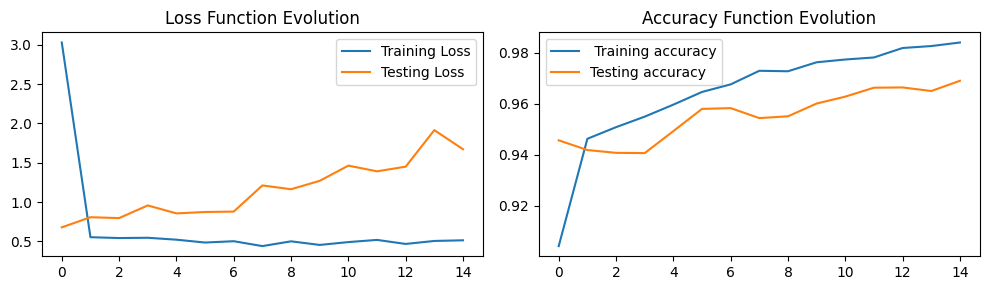

In [29]:
history_8 = model_8.fit(X_train_pca, y_train_pca, epochs=15, batch_size=32, validation_data=(X_test_pca, y_test_pca), shuffle=True)
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.plot(history_8.history['loss'], label='Training Loss')
plt.plot(history_8.history['val_loss'], label='Testing Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_8.history['accuracy'], label=' Training accuracy')
plt.plot(history_8.history['val_accuracy'], label='Testing accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

### Testing All Models on Training Dataset and Testing Dataset

#### Model-1

Training Accuracy :  94.46
Testing Accuracy :  93.85


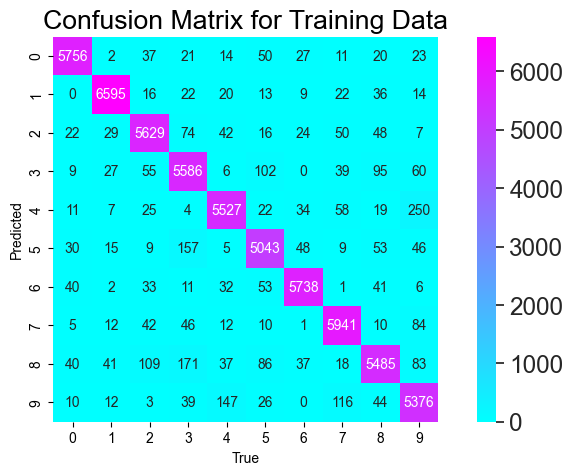

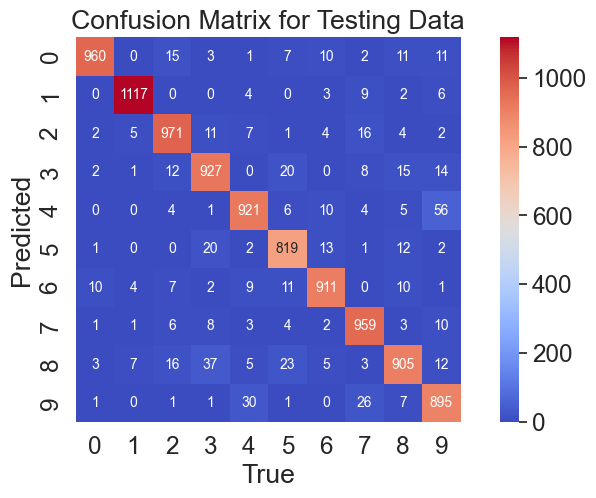

In [30]:
################## Testing on Training Data #############################
predict_x_tr=model_1.predict(X_train) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train:
  yy_train.append(np. argmax(x, axis=None))

m1_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m1_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_1.predict(X_test) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test:
  yy_test.append(np. argmax(x, axis=None))
m1_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m1_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-2

Training Accuracy :  98.56166666666667
Testing Accuracy :  96.98


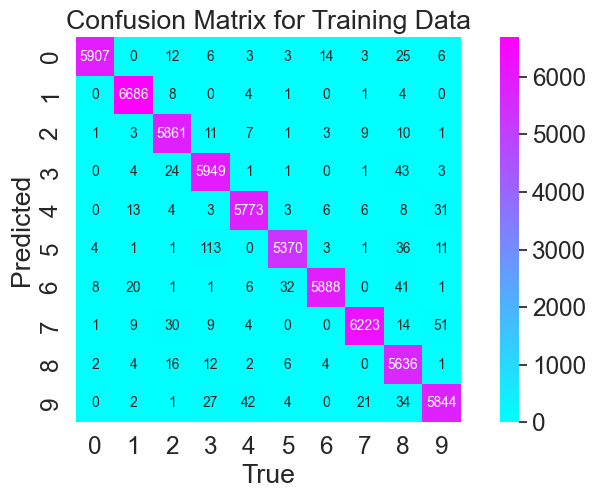

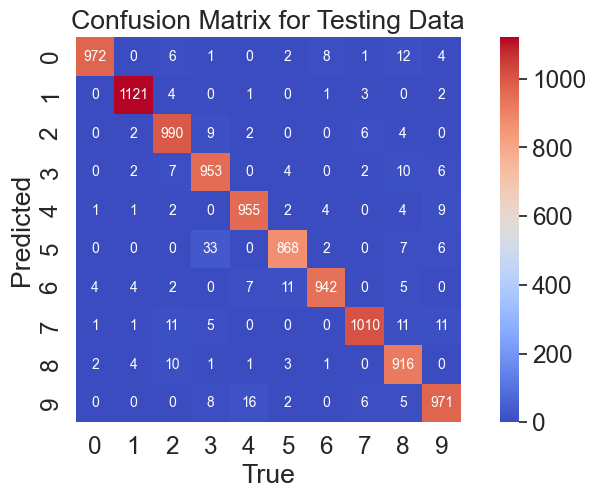

In [31]:
################## Testing on Training Data #############################
predict_x_tr=model_2.predict(X_train) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train:
  yy_train.append(np. argmax(x, axis=None))

m2_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m2_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_2.predict(X_test) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test:
  yy_test.append(np. argmax(x, axis=None))

m2_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m2_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-3

Training Accuracy :  95.47166666666666
Testing Accuracy :  95.00999999999999


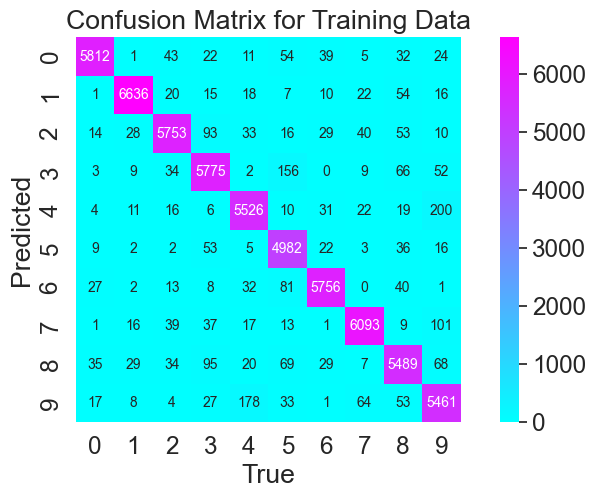

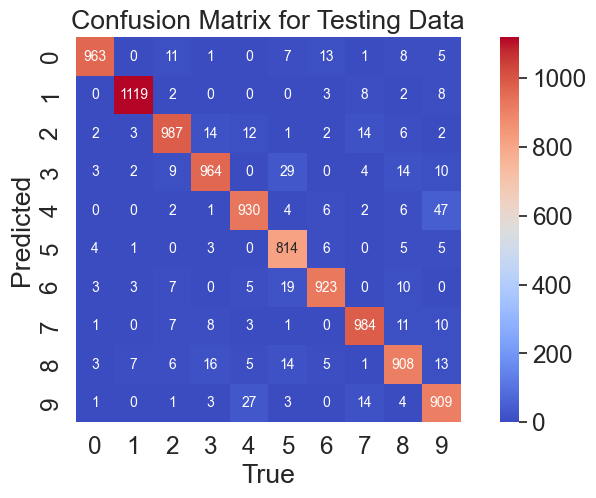

In [32]:
################## Testing on Training Data #############################
predict_x_tr=model_3.predict(X_train) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train:
  yy_train.append(np. argmax(x, axis=None))

m3_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m3_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_3.predict(X_test) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test:
  yy_test.append(np. argmax(x, axis=None))

m3_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m3_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-4

Training Accuracy :  98.125
Testing Accuracy :  96.63000000000001


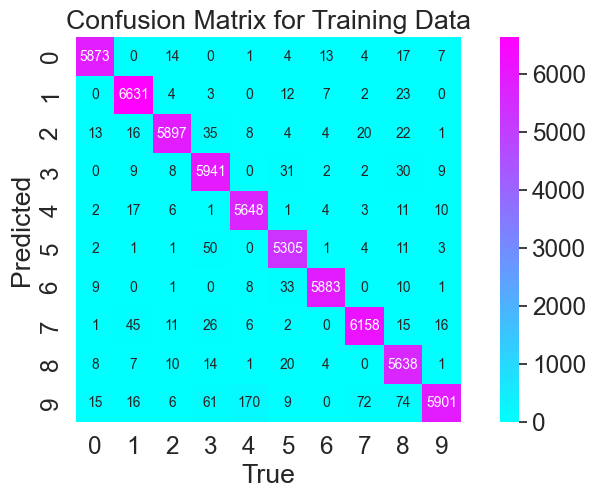

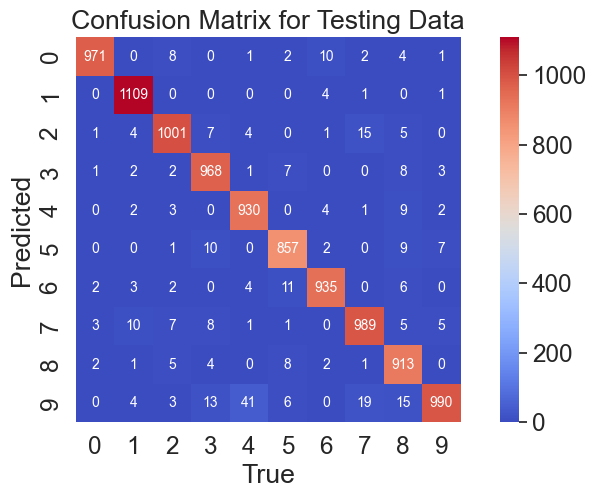

In [33]:
################## Testing on Training Data #############################
predict_x_tr=model_4.predict(X_train) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train:
  yy_train.append(np. argmax(x, axis=None))

m4_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m4_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_4.predict(X_test) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test:
  yy_test.append(np. argmax(x, axis=None))

m4_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m4_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-5

Training Accuracy :  96.89666666666666
Testing Accuracy :  94.73


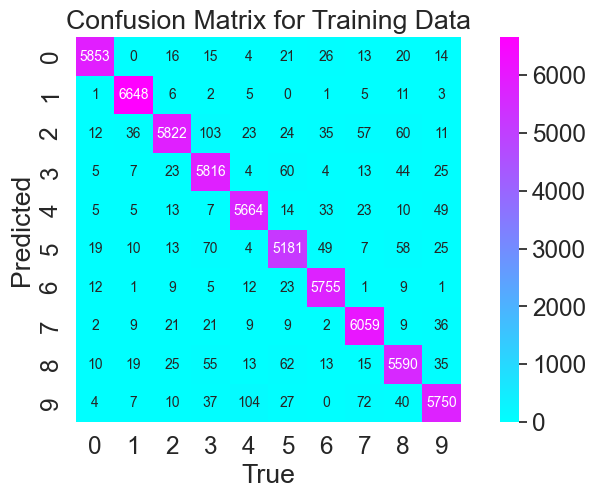

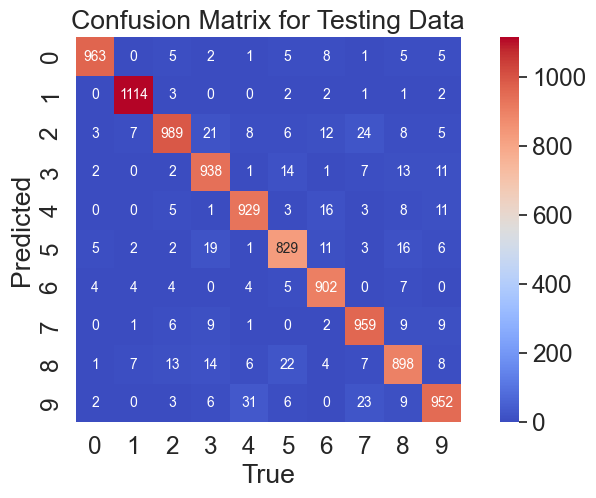

In [34]:
################## Testing on Training Data #############################
predict_x_tr=model_5.predict(X_train_pca) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train_pca:
  yy_train.append(np. argmax(x, axis=None))

m5_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m5_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_5.predict(X_test_pca) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test_pca:
  yy_test.append(np. argmax(x, axis=None))

m5_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m5_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-6

Training Accuracy :  98.97
Testing Accuracy :  96.67


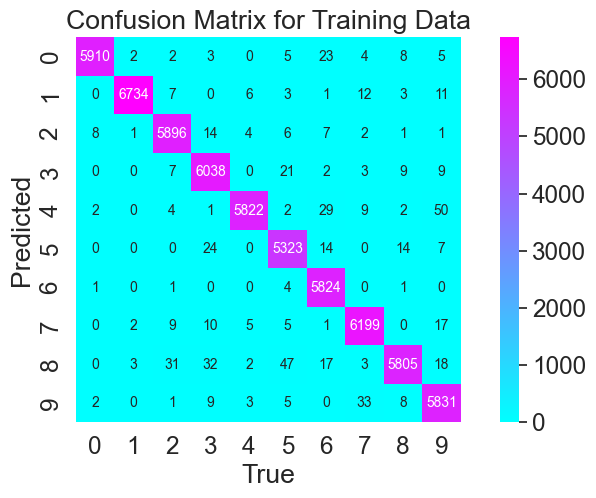

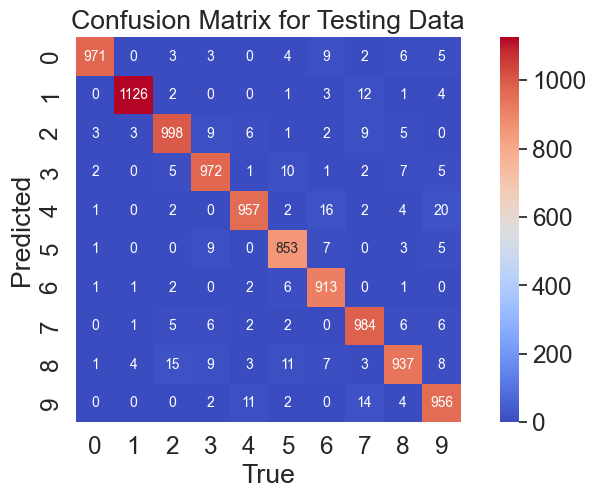

In [35]:
################## Testing on Training Data #############################
predict_x_tr=model_6.predict(X_train_pca) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train_pca:
  yy_train.append(np. argmax(x, axis=None))

m6_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m6_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_6.predict(X_test_pca) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test_pca:
  yy_test.append(np. argmax(x, axis=None))

m6_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m6_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-7

Training Accuracy :  98.73833333333333
Testing Accuracy :  96.57


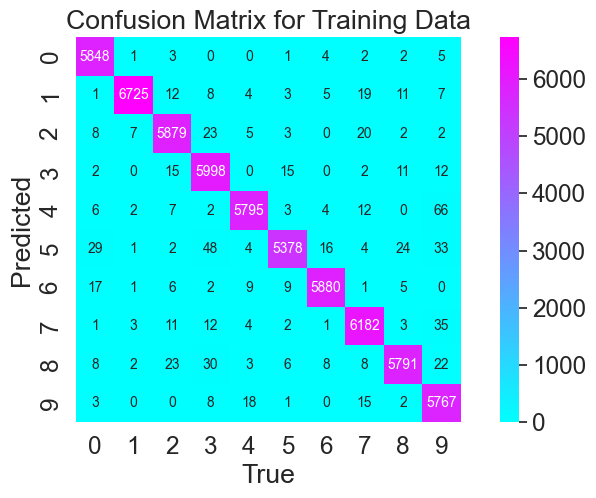

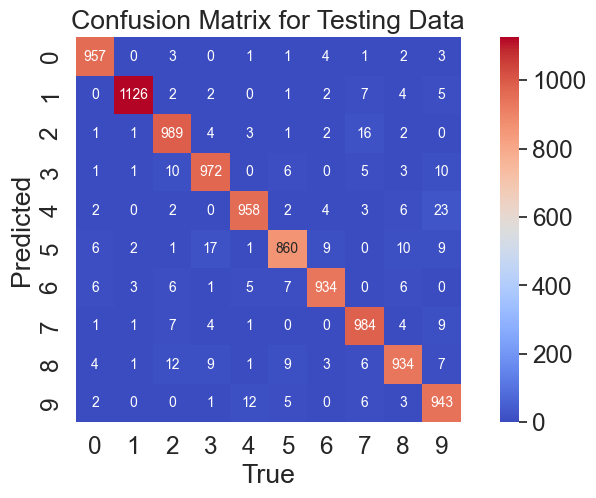

In [36]:
################## Testing on Training Data #############################
predict_x_tr=model_7.predict(X_train_pca) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train_pca:
  yy_train.append(np. argmax(x, axis=None))

m7_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m7_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_7.predict(X_test_pca) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test_pca:
  yy_test.append(np. argmax(x, axis=None))

m7_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m7_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

#### Model-8

Training Accuracy :  98.79833333333333
Testing Accuracy :  96.89999999999999


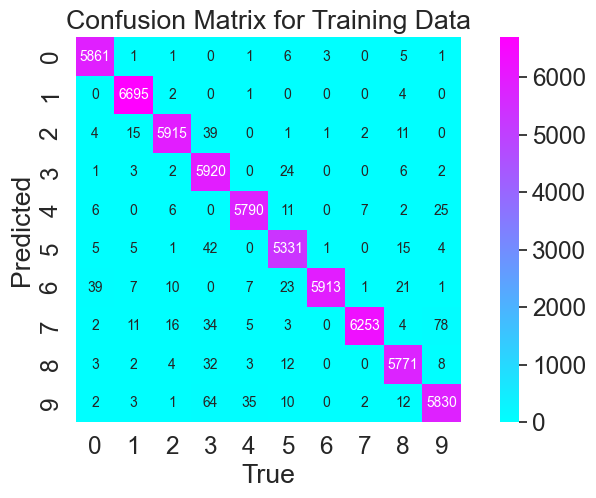

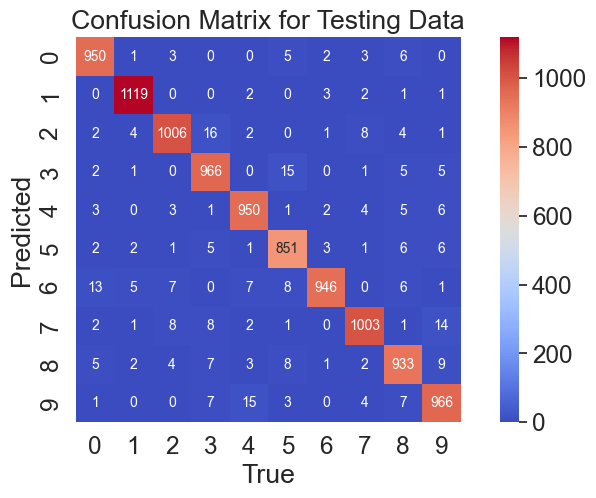

In [37]:
################## Testing on Training Data #############################
predict_x_tr=model_8.predict(X_train_pca) 
y_pred_tr=np.argmax(predict_x_tr,axis=1)
yy_train = []
for x in y_train_pca:
  yy_train.append(np. argmax(x, axis=None))

m8_tr_ac = accuracy_score(y_pred_tr, yy_train)*100
print("Training Accuracy : ",m8_tr_ac)

################## Testing on Testing Data ##############################
predict_x_te=model_8.predict(X_test_pca) 
y_pred_te=np.argmax(predict_x_te,axis=1)
yy_test = []
for x in y_test_pca:
  yy_test.append(np. argmax(x, axis=None))

m8_te_ac = accuracy_score(y_pred_te, yy_test)*100
print("Testing Accuracy : ",m8_te_ac)

################## Confusion Matrix of Training Data #####################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_tr, yy_train,labels=list(set(yy_train)))
df_cm = pd.DataFrame(cm, list(set(yy_train)), list(set(yy_train)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='cool', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

################## Confusion Matrix of Testing Data #######################
fig, ax = plt.subplots(figsize=(10,5))
cm = confusion_matrix(y_pred_te, yy_test,labels=list(set(yy_test)))
df_cm = pd.DataFrame(cm, list(set(yy_test)), list(set(yy_test)))
sn.set(font_scale=1.6)
sn.heatmap(df_cm,cmap='coolwarm', annot=True, annot_kws={"size": 10}, fmt='.4g', ax=ax, square=True)
plt.title('Confusion Matrix for Testing Data')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

### Comparisions

In [38]:
results = np.array([[m1_tr_ac,m1_te_ac],[m2_tr_ac,m2_te_ac],[m3_tr_ac,m3_te_ac],[m4_tr_ac,m4_te_ac],[m5_tr_ac,m5_te_ac],[m6_tr_ac,m6_te_ac],[m7_tr_ac,m7_te_ac],[m8_tr_ac,m8_te_ac]],dtype=float)
results = pd.DataFrame(results,index=['1H_Sig','1H_LeakR','2H_Sig','2H_LeakR','1H_Sig_PCA','1H_LeakR_PCA','2H_Sig_PCA','2H_LeakR_PCA'],columns=['Training Acc','Testing Acc'])
results

,Training Acc,Testing Acc
1H_Sig,94.460000,93.85
1H_LeakR,98.561667,96.98
2H_Sig,95.471667,95.01
2H_LeakR,98.125000,96.63
1H_Sig_PCA,96.896667,94.73
1H_LeakR_PCA,98.970000,96.67
2H_Sig_PCA,98.738333,96.57
2H_LeakR_PCA,98.798333,96.90


### Observations

* I implemented classification task by using 8 different models of different number of models, activation functions and implemented dimensionality reduction on dataset also.
* Mainly, I used Sigmoid, Leaky Relu Activation Functions. 

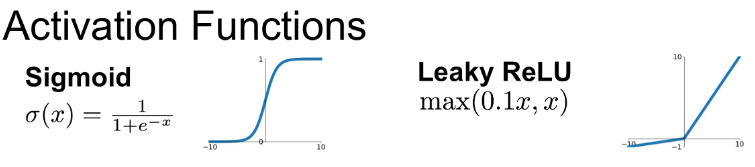

* In all cases Leaky ReLU works better than the sigmoid.
* I used categorical cross entropy and adam optimizier in all models.

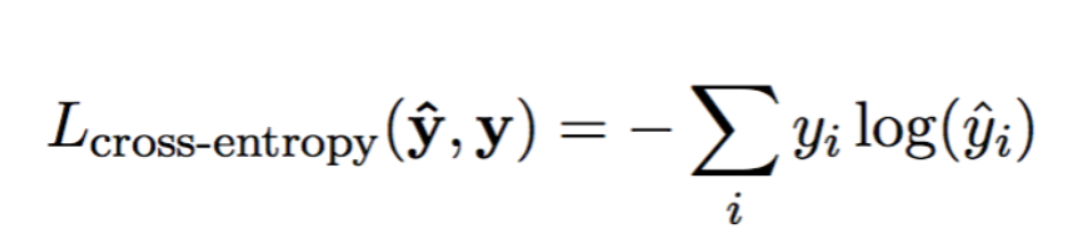

* In all models I used softmax function. Softmax function makes all values into corresponding probabilities. The highest probability denotes the class of the image.

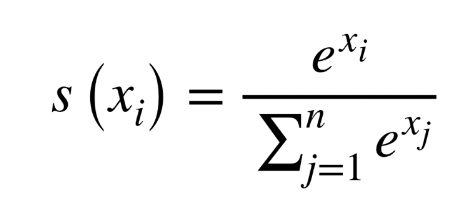

* Using PCA for decreasing dimensions of data , reduces the training time
* Finally, I successfully implemented robust model which classify the hand-written digits with high accuracy.